## Trajectory Statistics

### Calculating some statistics in a per-trip basis.

Measures (total and between GPS readings or 'takes'):
* Duration (given in seconds)
* Distance (given in meters)
  * Average speed = Distance / Duration * 3.6 (given in km/h)

Statistics:
* Total
* Mean
* Minimum
* Maximum
* Standard deviation
* Skewness

The number of takes in each trips is also returned.

### Libraries

In [1]:
import pandas as pd
import json
import numpy as np
from haversine import haversine, Unit
import scipy.stats as st
from matplotlib import pyplot as plt

from yellow import plots

### Trips

In [2]:
"""
trips = pd.read_csv('~/saida.csv')
print(len(trips), 'trips')
trips.head()
"""
pass

### Calculations

In [3]:
count = 0

def calculate_statistics(row):
    global count
    count += 1
    if count % 1000 == 0: print(count)
        
    timestamps = json.loads(row.timestamps)
    if len(timestamps) == 1:
        return 1, None, None, None, None, None, None, None, None, None, None, None, None
    
    timestamps = iter(timestamps)
    ant = next(timestamps)
    durations = []
    for time in timestamps:
        durations.append(time - ant)
        ant = time
    
    lats = json.loads(row.lats)
    longs = json.loads(row.longs)
    points = zip(lats, longs)
    ant = next(points)
    distances = []
    for point in points:
        distances.append(haversine((ant[0], ant[1]), (point[0], point[1]), unit=Unit.METERS))
        ant = point
    
    return len(lats),           \
           np.sum(durations),   \
           np.mean(durations),  \
           np.min(durations),   \
           np.max(durations),   \
           np.std(durations),   \
           st.skew(durations),  \
           np.sum(distances),   \
           np.mean(distances),  \
           np.min(distances),   \
           np.max(distances),   \
           np.std(distances),   \
           st.skew(distances)

stats_columns = [
         'num_takes', 
         'total_duration', 'mean_take_time', 'take_time_min', 'take_time_max', 'take_time_std', 'take_time_skew',
         'total_distance', 'mean_take_dist', 'take_dist_min', 'take_dist_max', 'take_dist_std', 'take_dist_skew'
]
#trips[stats_columns] = trips.apply(calculate_statistics, axis=1, result_type='expand')
#trips[['tripid'] + stats_columns].to_csv('~/traj-stats.csv', index=False)
#trips.head()

Previously saved file

In [4]:
stats = pd.read_csv('~/traj-stats.csv')
stats.head()

tripid  num_takes  \
0  75b1aba38fc22016e5770e8b5c5e517efee06ed23544d1...        1.0   
1  daadf046a3b54be5dfa3885ae8e91b416d301b8c2cdd6e...        2.0   
2  0dce3489467eb12a7f6df6e9dd219fae235414192cfd7d...        1.0   
3  e41936fda2bdf2baefef3ae2d007405768d2dfb1a69d74...        1.0   
4  d79a96b92300855c6756872fe342c9cf6da9d0f87b1c78...        1.0   

   total_duration  mean_take_time  take_time_min  take_time_max  \
0             NaN             NaN            NaN            NaN   
1           0.032           0.032          0.032          0.032   
2             NaN             NaN            NaN            NaN   
3             NaN             NaN            NaN            NaN   
4             NaN             NaN            NaN            NaN   

   take_time_std  take_time_skew  total_distance  mean_take_dist  \
0            NaN             NaN             NaN             NaN   
1            0.0             0.0        0.126042        0.126042   
2            NaN             NaN             NaN             NaN   
3            NaN             NaN             NaN             NaN   
4            NaN             NaN             NaN             NaN   

   take_dist_min  take_dist_max  take_dist_std  take_dist_skew  
0            NaN            NaN            NaN             NaN  
1       0.126042       0.126042            0.0             0.0  
2            NaN            NaN            NaN             NaN  
3            NaN            NaN            NaN             NaN  
4            NaN            NaN            NaN             NaN

### Distributions

Showing distributions of values in normal and log scales.

* Number of GPS location readings

GPS takes


count    427026.000000
mean        100.147855
std         397.737998
min           1.000000
25%           5.000000
50%          44.000000
75%         111.000000
max      143259.000000
Name: num_takes, dtype: float64

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


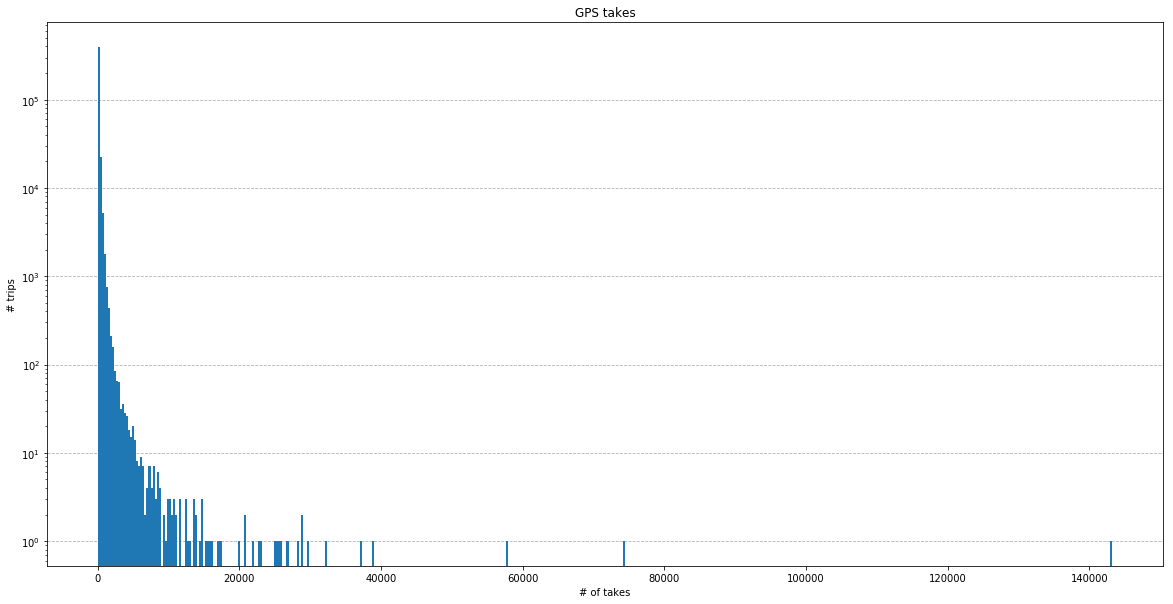

In [5]:
title = 'GPS takes'
print(title)
stat = stats.num_takes
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.log_scale(y=True)
plots.dist_chart(stat, title, '# of takes')
plt.show()

GPS takes


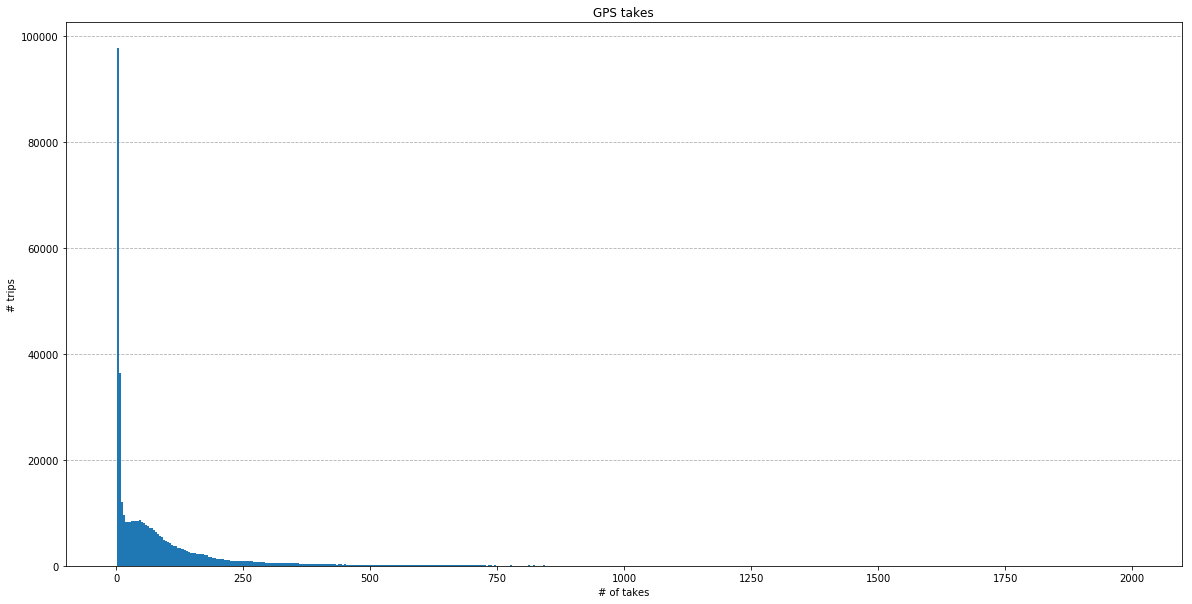

In [6]:
title = 'GPS takes'
print(title)
stat = stats.num_takes
plt.figure(figsize=(20, 10))
plots.dist_chart(stat[(stat >= 1) & (stat <= 2000)], title, '# of takes')
plt.show()

* Total trip duration

Trip duration


count    386855.000000
mean         15.233944
std         147.082390
min           0.000017
25%           1.390458
50%           6.860533
75%          14.970617
max       42621.611833
Name: total_duration, dtype: float64

/usr/local/lib/python3.5/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.5/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


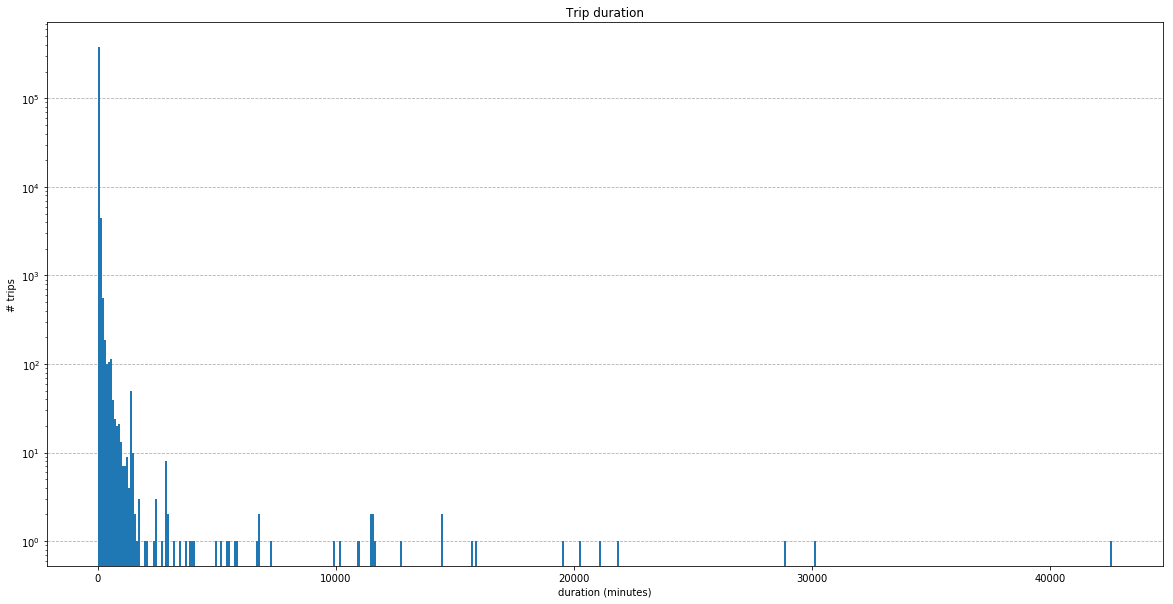

In [7]:
title = 'Trip duration'
print(title)
stat = stats.total_duration / 60
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.log_scale(y=True)
plots.dist_chart(stat, title, 'duration (minutes)')
plt.show()

Trip duration


count    386855.000000
mean         15.233944
std         147.082390
min           0.000017
25%           1.390458
50%           6.860533
75%          14.970617
max       42621.611833
Name: total_duration, dtype: float64

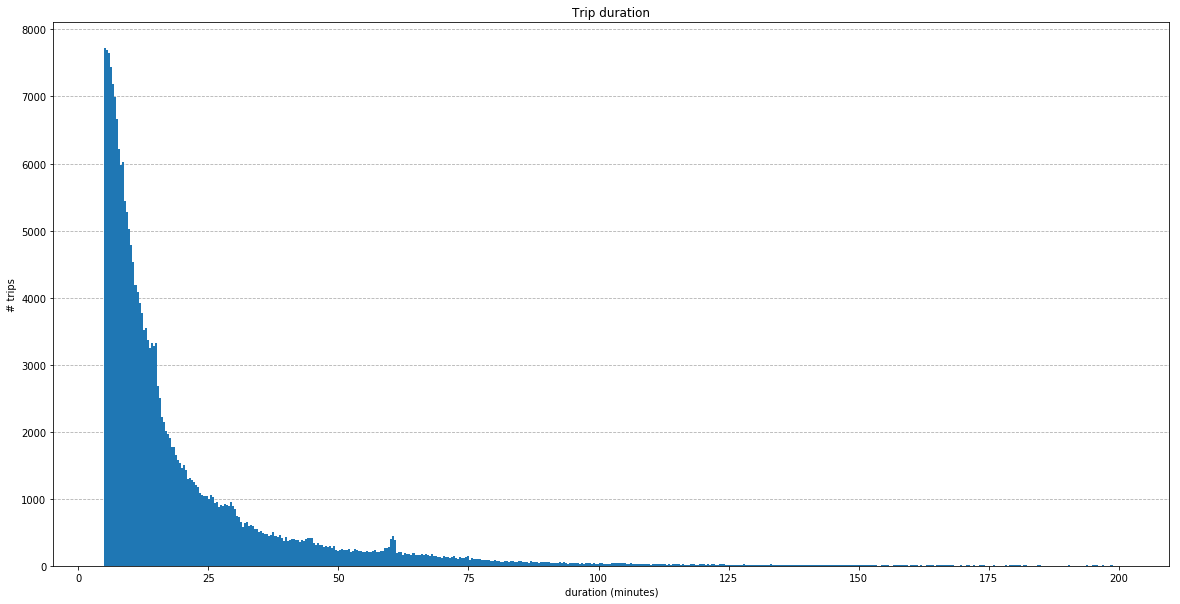

In [8]:
title = 'Trip duration'
print(title)
stat = stats.total_duration / 60
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.dist_chart(stat[(stat >= 5) & (stat <= 200)], title, 'duration (minutes)')
plt.show()

* Average time between GPS takes

Mean GPS take time


count    386855.000000
mean         29.036354
std         730.490488
min           0.001000
25%           4.985966
50%           6.445711
75%           9.977500
max      172799.577000
Name: mean_take_time, dtype: float64

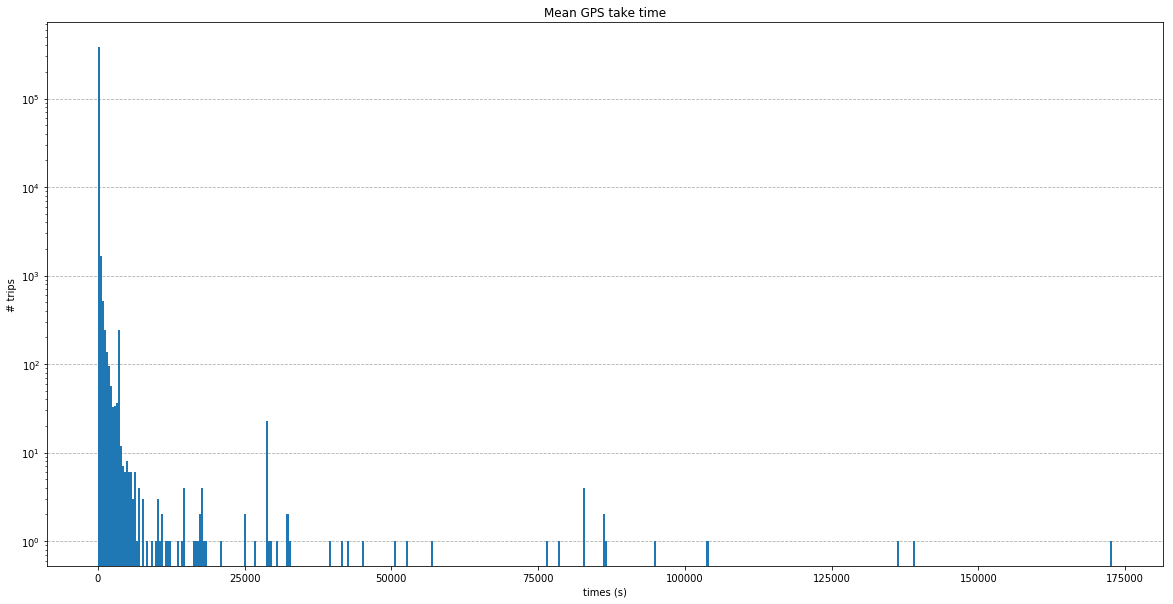

In [9]:
title = 'Mean GPS take time'
print(title)
stat = stats.mean_take_time
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.log_scale(y=True)
# [stat < 50]
plots.dist_chart(stat, title, 'times (s)')
plt.show()

Mean GPS take time


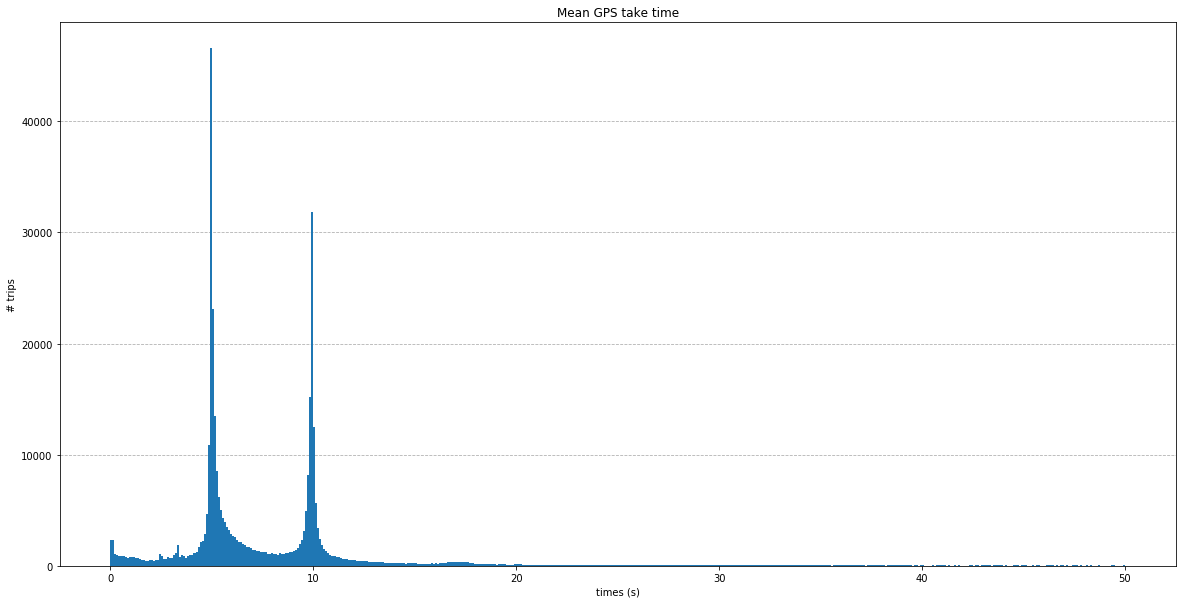

In [10]:
title = 'Mean GPS take time'
print(title)
stat = stats.mean_take_time
plt.figure(figsize=(20, 10))
plots.dist_chart(stat[stat < 50], title, 'times (s)')
plt.show()

* Minimum interval between GPS takes

Min GPS take time


count    386855.000000
mean         13.186295
std         579.457016
min           0.001000
25%           0.396000
50%           1.633000
75%           4.438000
max      172799.577000
Name: take_time_min, dtype: float64

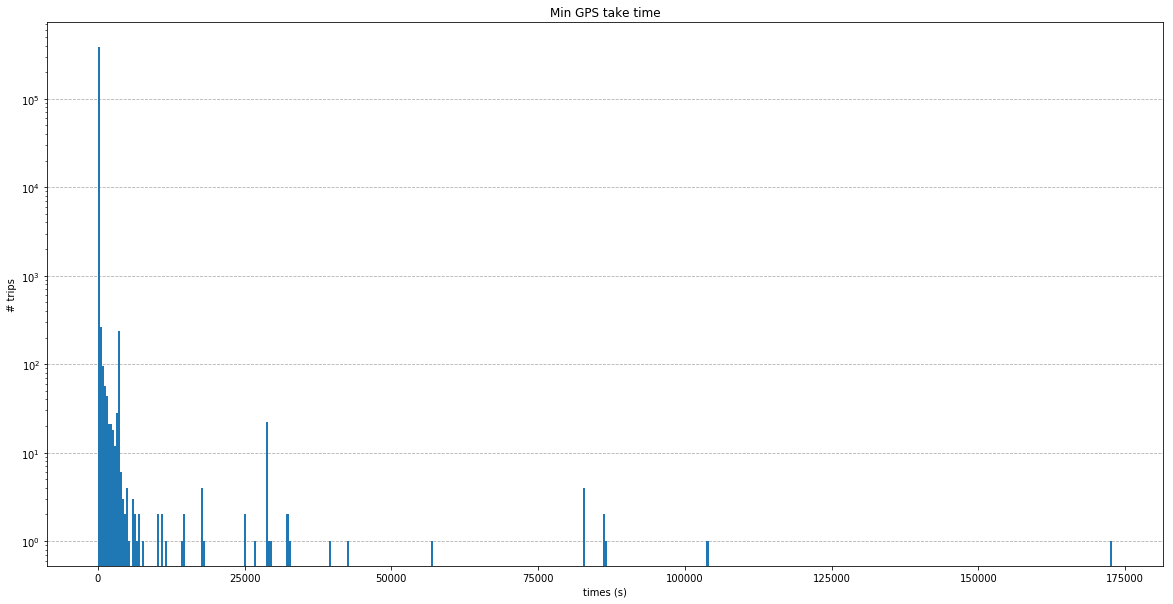

In [11]:
title = 'Min GPS take time'
print(title)
stat = stats.take_time_min
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.log_scale(y=True)
plots.dist_chart(stat, title, 'times (s)')
plt.show()

Min GPS take time


count    386855.000000
mean         13.186295
std         579.457016
min           0.001000
25%           0.396000
50%           1.633000
75%           4.438000
max      172799.577000
Name: take_time_min, dtype: float64

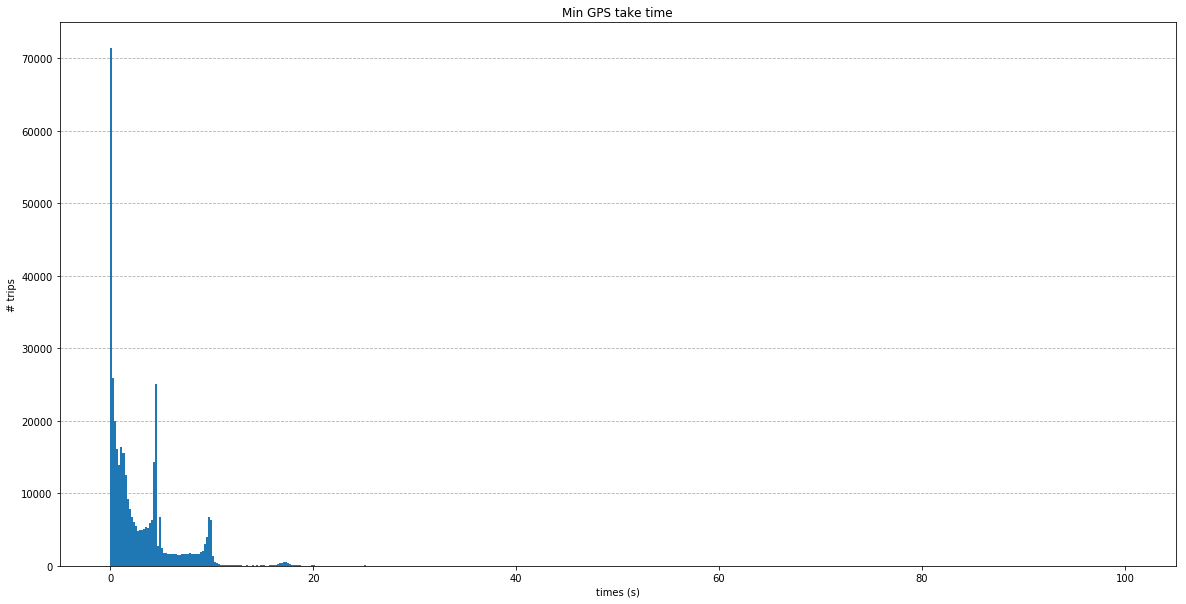

In [12]:
title = 'Min GPS take time'
print(title)
stat = stats.take_time_min
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.dist_chart(stat[stat < 100], title, 'times (s)')
plt.show()

* Maximum interval between GPS takes

Max GPS take time


count    3.868550e+05
mean     2.653198e+02
std      7.890774e+03
min      9.999275e-04
25%      8.061000e+00
50%      1.280400e+01
75%      2.823600e+01
max      2.150238e+06
Name: take_time_max, dtype: float64

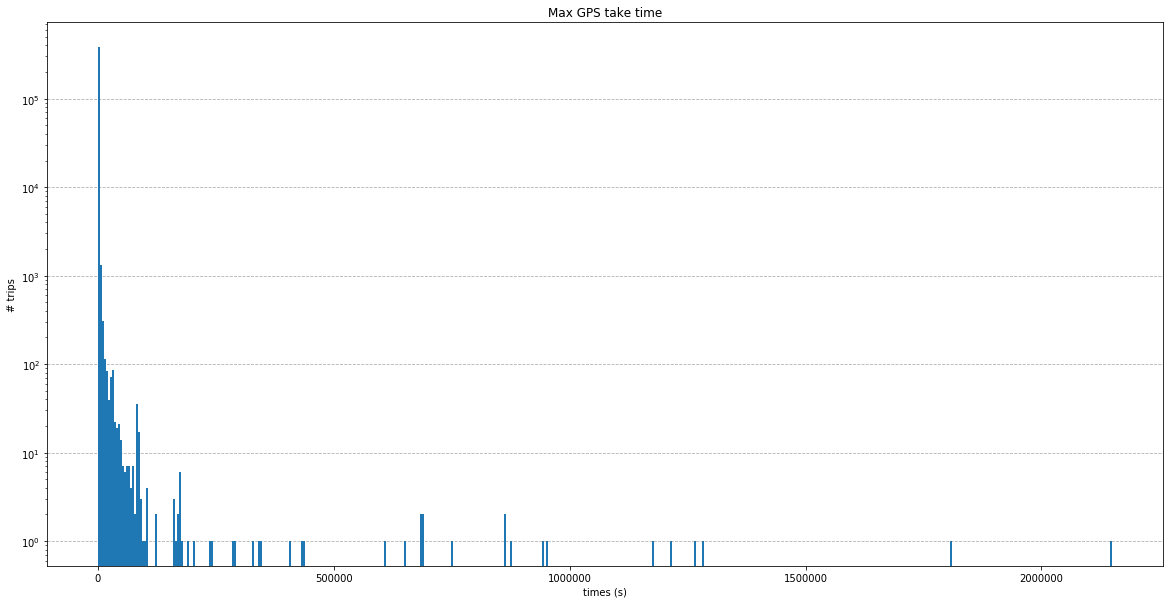

In [13]:
title = 'Max GPS take time'
print(title)
stat = stats.take_time_max
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.log_scale(y=True)
plots.dist_chart(stat, title, 'times (s)')
plt.show()

Max GPS take time


count    3.868550e+05
mean     2.653198e+02
std      7.890774e+03
min      9.999275e-04
25%      8.061000e+00
50%      1.280400e+01
75%      2.823600e+01
max      2.150238e+06
Name: take_time_max, dtype: float64

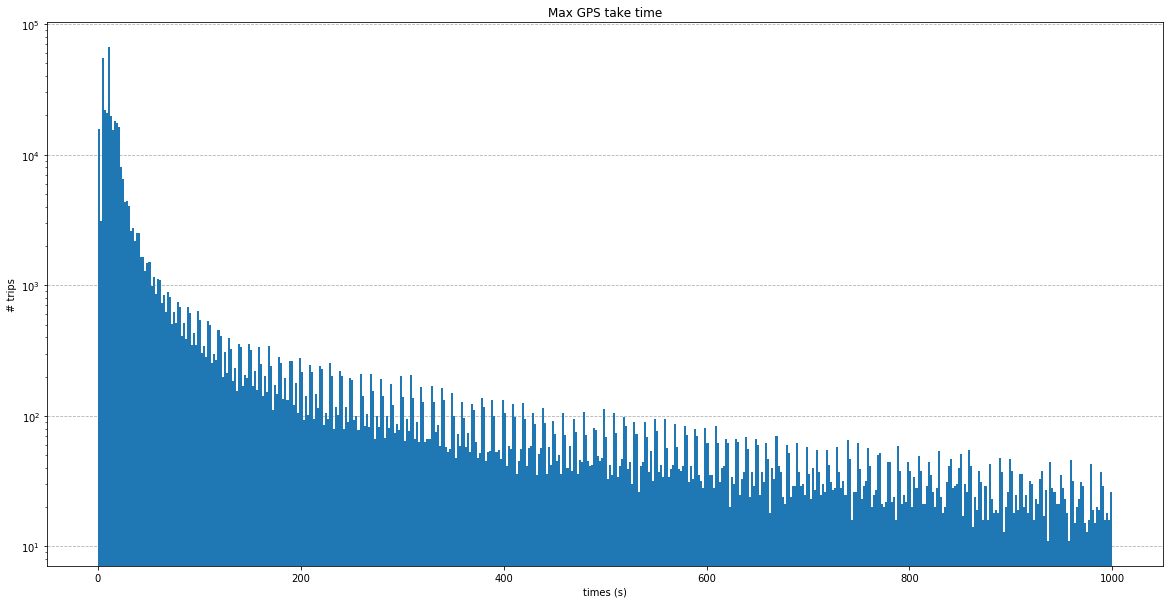

In [14]:
title = 'Max GPS take time'
print(title)
stat = stats.take_time_max
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.log_scale(y=True)
plots.dist_chart(stat[stat < 1000], title, 'times (s)')
plt.show()

* Is there variation between take times in the same trip?

GPS take time - st. dev.


count    386855.000000
mean         38.890504
std        1347.823126
min           0.000000
25%           0.540710
50%           1.563500
75%           3.899476
max      482215.964833
Name: take_time_std, dtype: float64

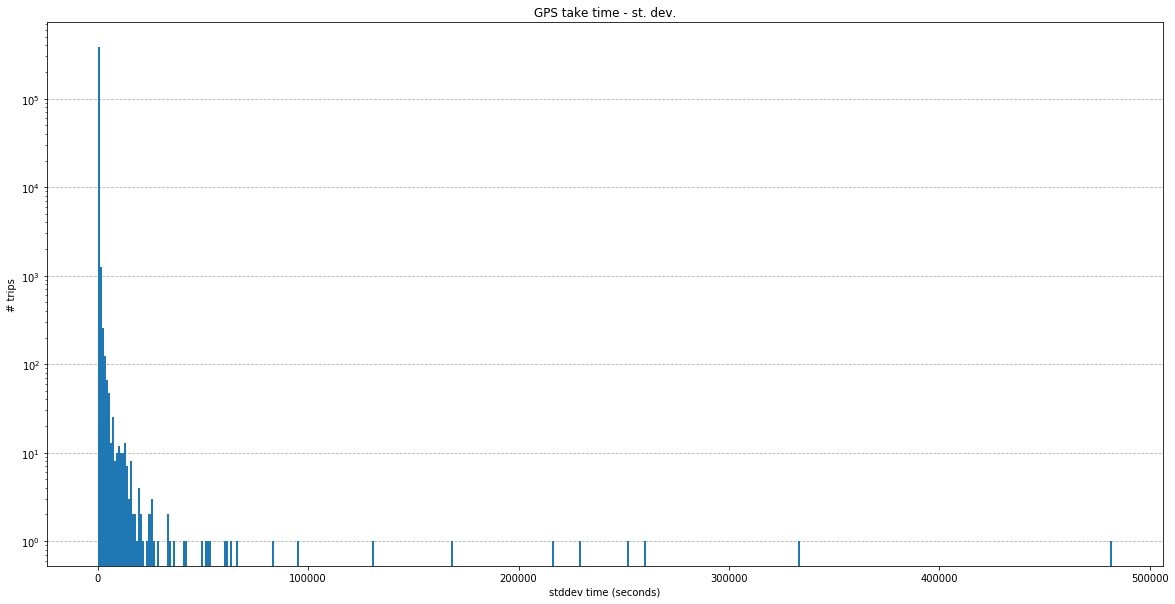

In [15]:
title = 'GPS take time - st. dev.'
print(title)
stat = stats.take_time_std
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.log_scale(y=True)
plots.dist_chart(stat, title, 'stddev time (seconds)')
plt.show()

GPS take time - st. dev.


count    386855.000000
mean         38.890504
std        1347.823126
min           0.000000
25%           0.540710
50%           1.563500
75%           3.899476
max      482215.964833
Name: take_time_std, dtype: float64

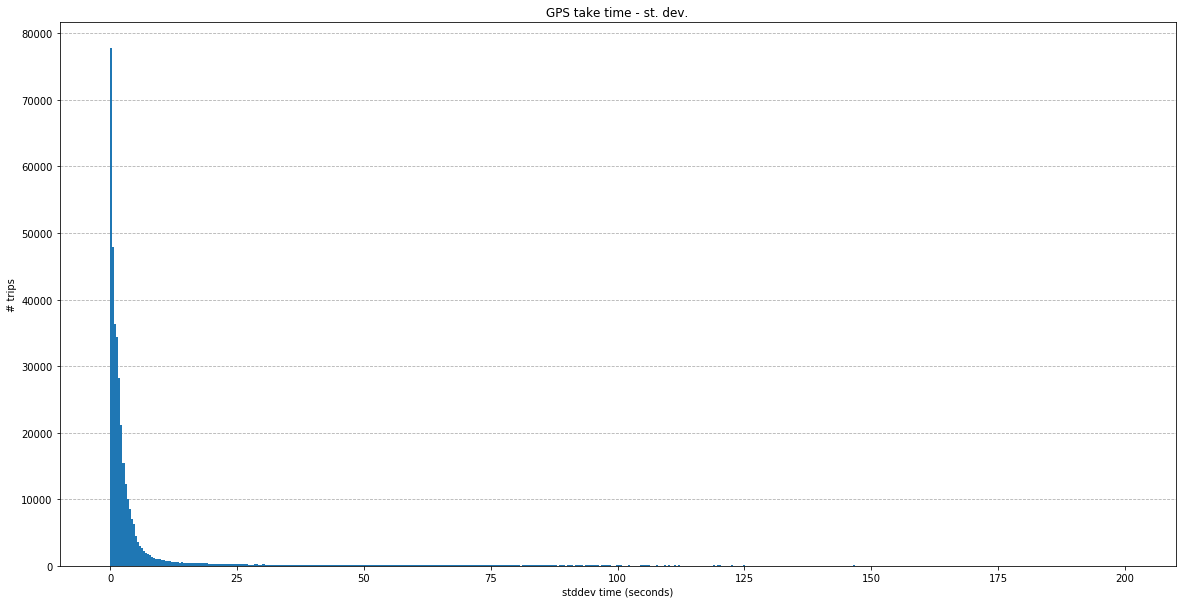

In [16]:
title = 'GPS take time - st. dev.'
print(title)
stat = stats.take_time_std
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.dist_chart(stat[(stat <= 200)], title, 'stddev time (seconds)')
plt.show()

* Asymmetry of take intervals

GPS take time skewness


count    386855.000000
mean          1.516878
std           5.627534
min         -31.254077
25%          -0.741153
50%           0.311876
75%           3.604098
max         172.568825
Name: take_time_skew, dtype: float64

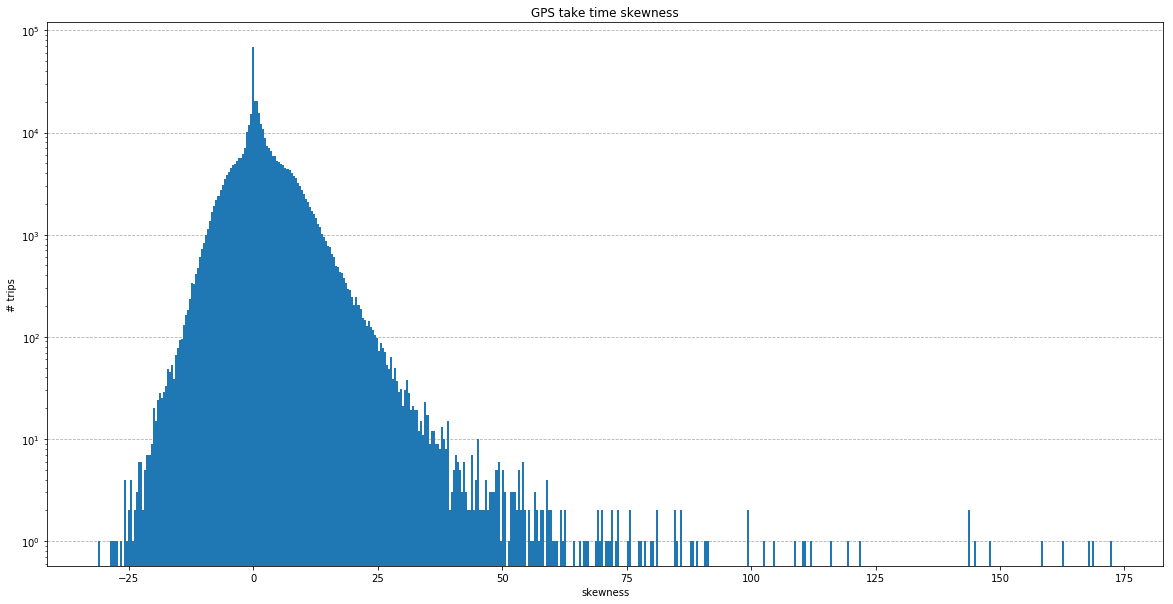

In [17]:
title = 'GPS take time skewness'
print(title)
stat = stats.take_time_skew
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.log_scale(y=True)
plots.dist_chart(stat, title, 'skewness')
plt.show()

GPS take time skewness


count    386855.000000
mean          1.516878
std           5.627534
min         -31.254077
25%          -0.741153
50%           0.311876
75%           3.604098
max         172.568825
Name: take_time_skew, dtype: float64

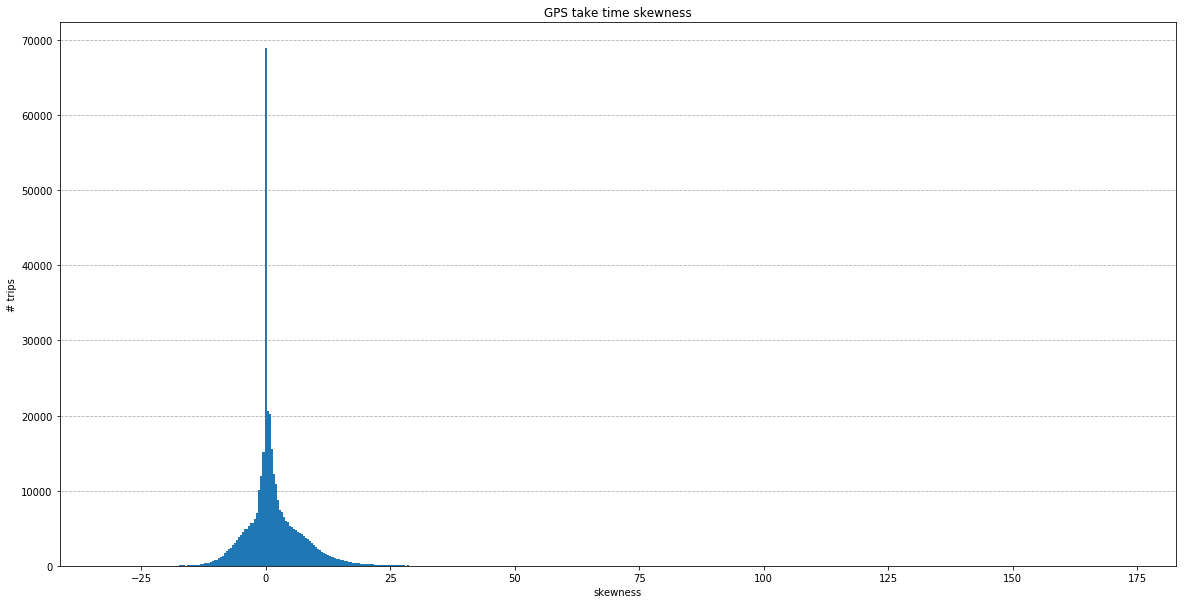

In [18]:
title = 'GPS take time skewness'
print(title)
stat = stats.take_time_skew
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.dist_chart(stat, title, 'skewness')
plt.show()

* Travelled distances

Travelled distances


count    386855.000000
mean          7.486769
std        1590.899706
min           0.000000
25%           0.053648
50%           0.957113
75%           2.109550
max      690844.603810
Name: total_distance, dtype: float64

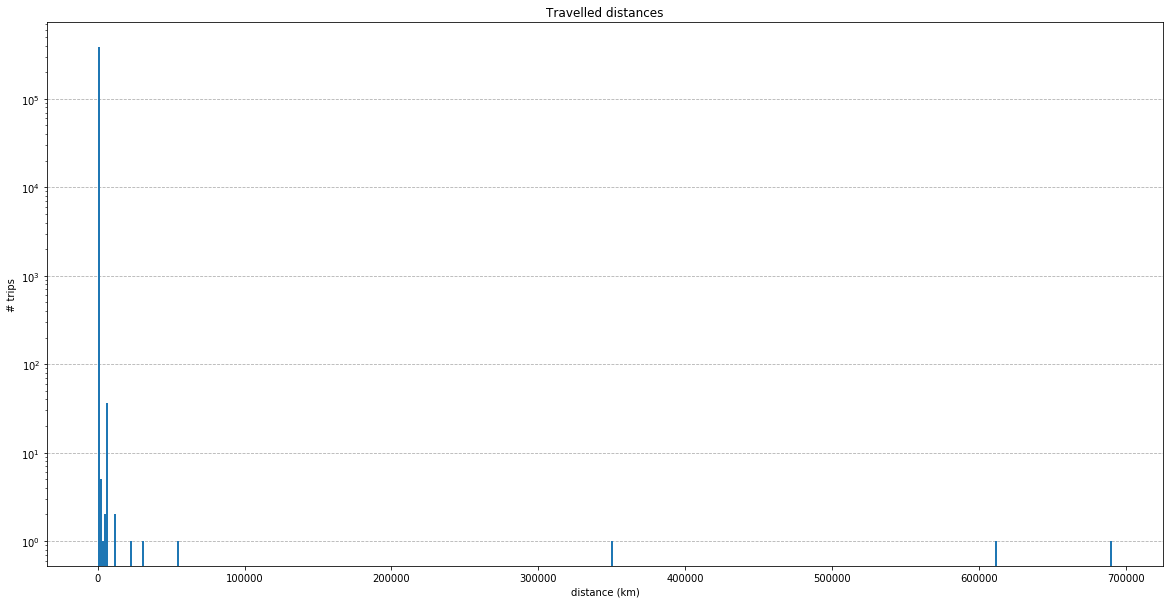

In [19]:
title = 'Travelled distances'
print(title)
stat = stats.total_distance / 1000
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.log_scale(y=True)
plots.dist_chart(stat, title, 'distance (km)')
plt.show()

Travelled distances


count    386855.000000
mean          7.486769
std        1590.899706
min           0.000000
25%           0.053648
50%           0.957113
75%           2.109550
max      690844.603810
Name: total_distance, dtype: float64

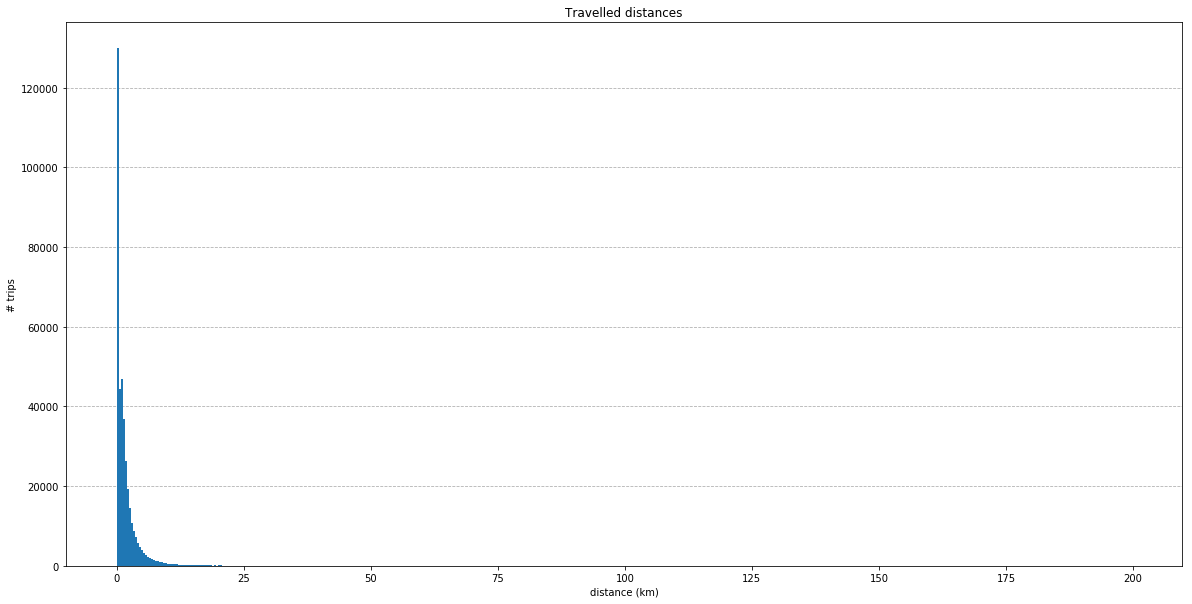

In [20]:
title = 'Travelled distances'
print(title)
stat = stats.total_distance / 1000
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.dist_chart(stat[stat < 200], title, 'distance (km)')
plt.show()

* Average distance between takes

Mean distance between GPS takes


count    3.868550e+05
mean     9.180737e+01
std      1.460864e+04
min      0.000000e+00
25%      4.350986e+00
50%      1.381342e+01
75%      2.281966e+01
max      5.679608e+06
Name: mean_take_dist, dtype: float64

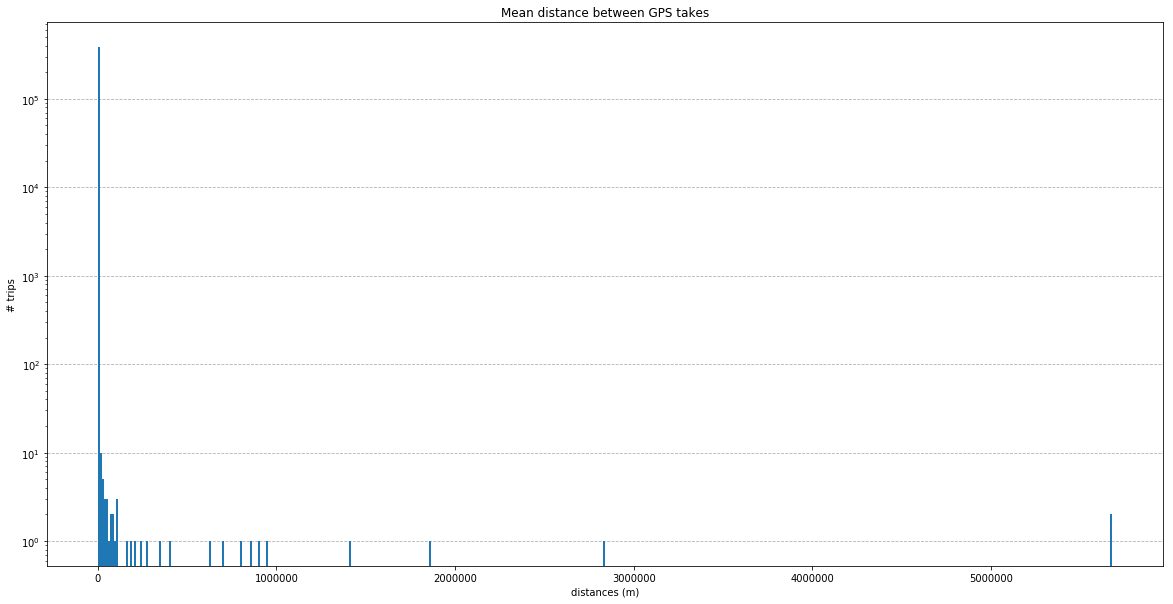

In [21]:
title = 'Mean distance between GPS takes'
print(title)
stat = stats.mean_take_dist
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.log_scale(y=True)
plots.dist_chart(stat, title, 'distances (m)')
plt.show()

Mean distance between GPS takes


count    3.868550e+05
mean     9.180737e+01
std      1.460864e+04
min      0.000000e+00
25%      4.350986e+00
50%      1.381342e+01
75%      2.281966e+01
max      5.679608e+06
Name: mean_take_dist, dtype: float64

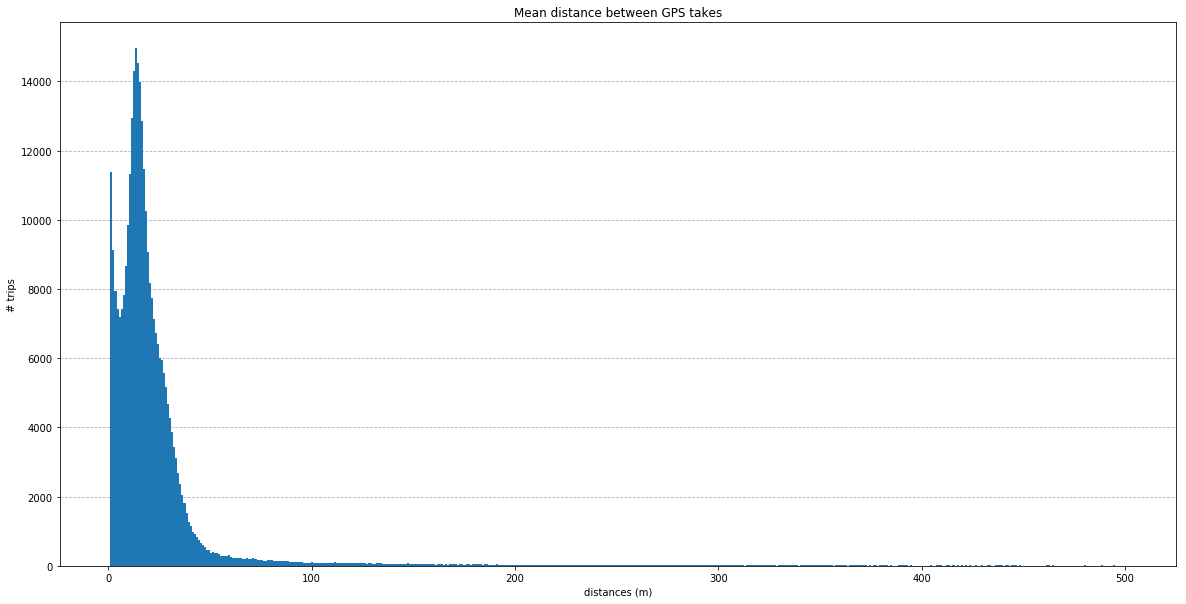

In [22]:
title = 'Mean distance between GPS takes'
print(title)
stat = stats.mean_take_dist
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.dist_chart(stat[(stat > 1) & (stat < 500)], title, 'distances (m)')
plt.show()

* Minimum travelled distance between GPS takes

Min distance between GPS takes


count    3.868550e+05
mean     3.163915e+01
std      1.290649e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.572548e-02
max      5.679608e+06
Name: take_dist_min, dtype: float64

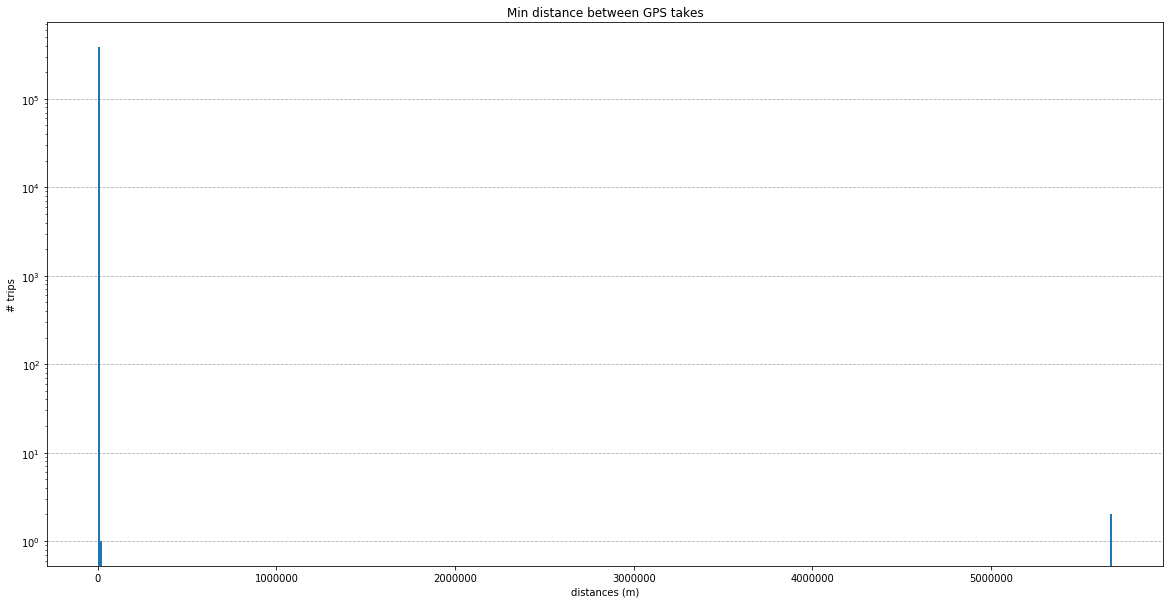

In [23]:
title = 'Min distance between GPS takes'
print(title)
stat = stats.take_dist_min
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.log_scale(y=True)
plots.dist_chart(stat, title, 'distances (m)')
plt.show()

Min distance between GPS takes


count    3.868550e+05
mean     3.163915e+01
std      1.290649e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.572548e-02
max      5.679608e+06
Name: take_dist_min, dtype: float64

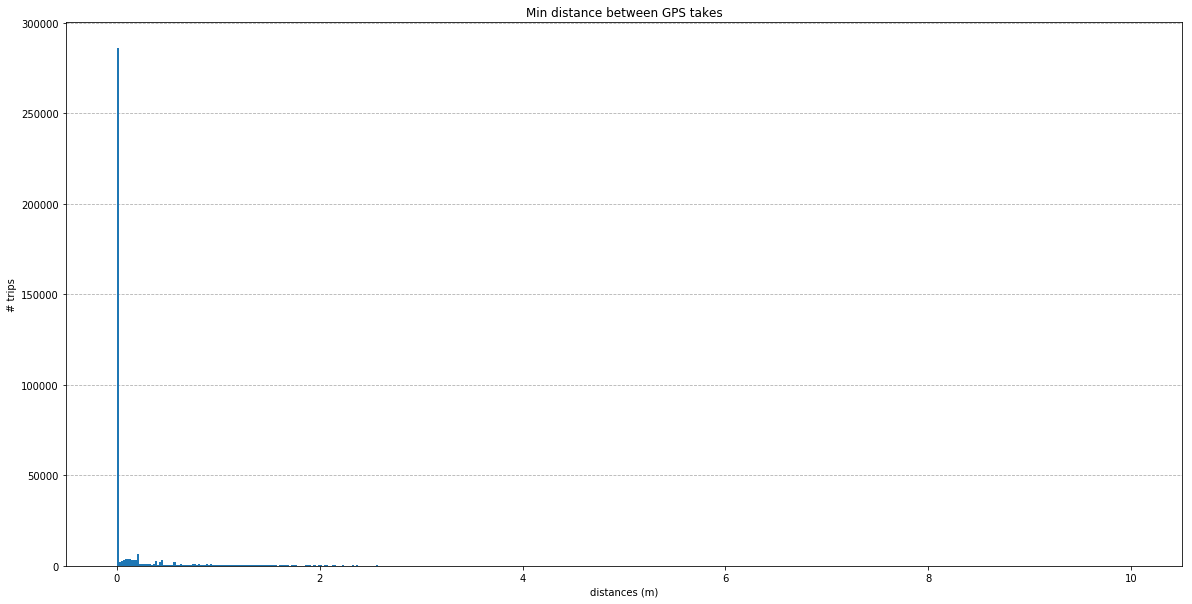

In [24]:
title = 'Min distance between GPS takes'
print(title)
stat = stats.take_dist_min
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.dist_chart(stat[stat < 10], title, 'distances (m)')
plt.show()

* Maximum travelled distance between GPS takes

Max distance between GPS takes


count    3.868550e+05
mean     9.938044e+02
std      7.247058e+04
min      0.000000e+00
25%      1.656047e+01
50%      5.090522e+01
75%      9.890225e+01
max      1.477037e+07
Name: take_dist_max, dtype: float64

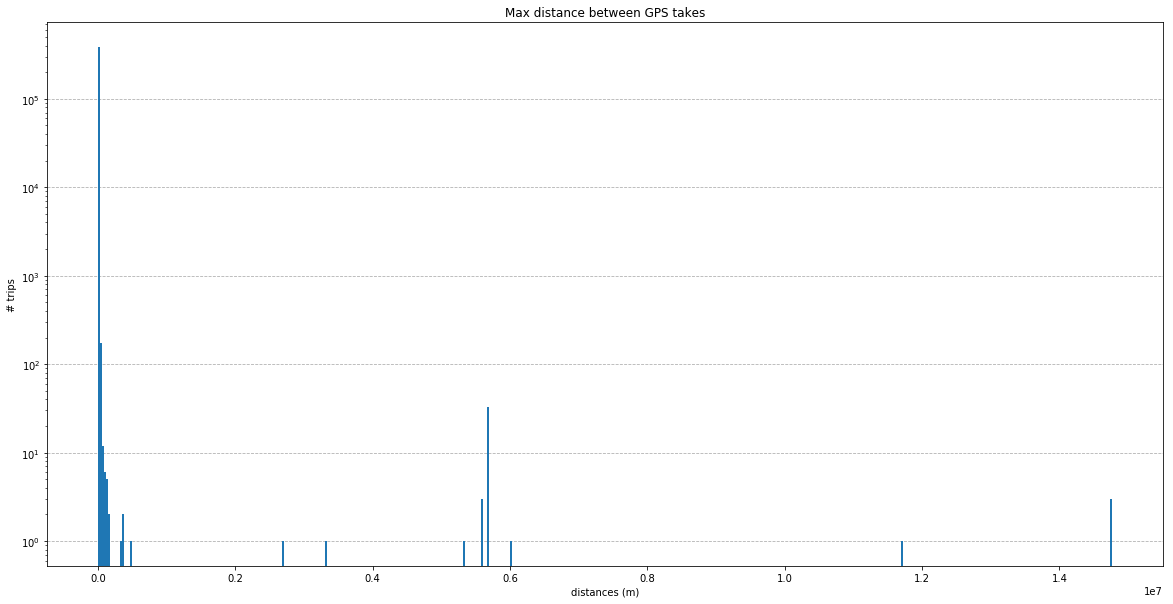

In [25]:
title = 'Max distance between GPS takes'
print(title)
stat = stats.take_dist_max
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.log_scale(y=True)
plots.dist_chart(stat, title, 'distances (m)')
plt.show()

Max distance between GPS takes


count    3.868550e+05
mean     9.938044e+02
std      7.247058e+04
min      0.000000e+00
25%      1.656047e+01
50%      5.090522e+01
75%      9.890225e+01
max      1.477037e+07
Name: take_dist_max, dtype: float64

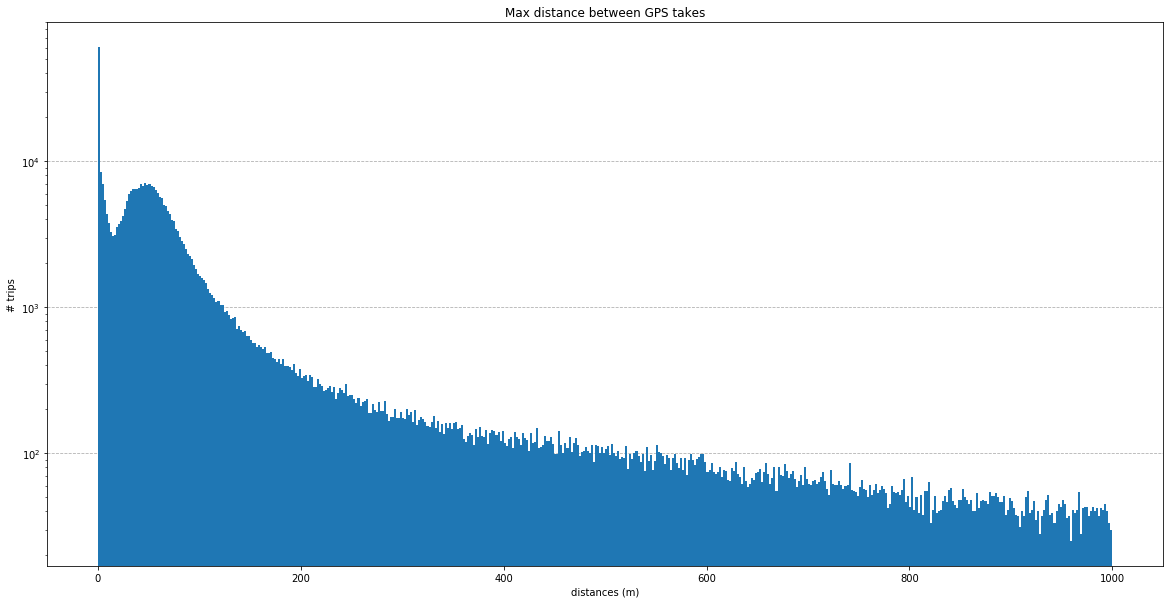

In [26]:
title = 'Max distance between GPS takes'
print(title)
stat = stats.take_dist_max
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.log_scale(y=True)
plots.dist_chart(stat[stat < 1000], title, 'distances (m)')
plt.show()

* Is there variation in distances between takes in the same trip?

Distance between GPS takes - st. dev.


count    3.868550e+05
mean     1.472382e+02
std      1.235631e+04
min      0.000000e+00
25%      4.110330e+00
50%      1.133822e+01
75%      1.912931e+01
max      2.838789e+06
Name: take_dist_std, dtype: float64

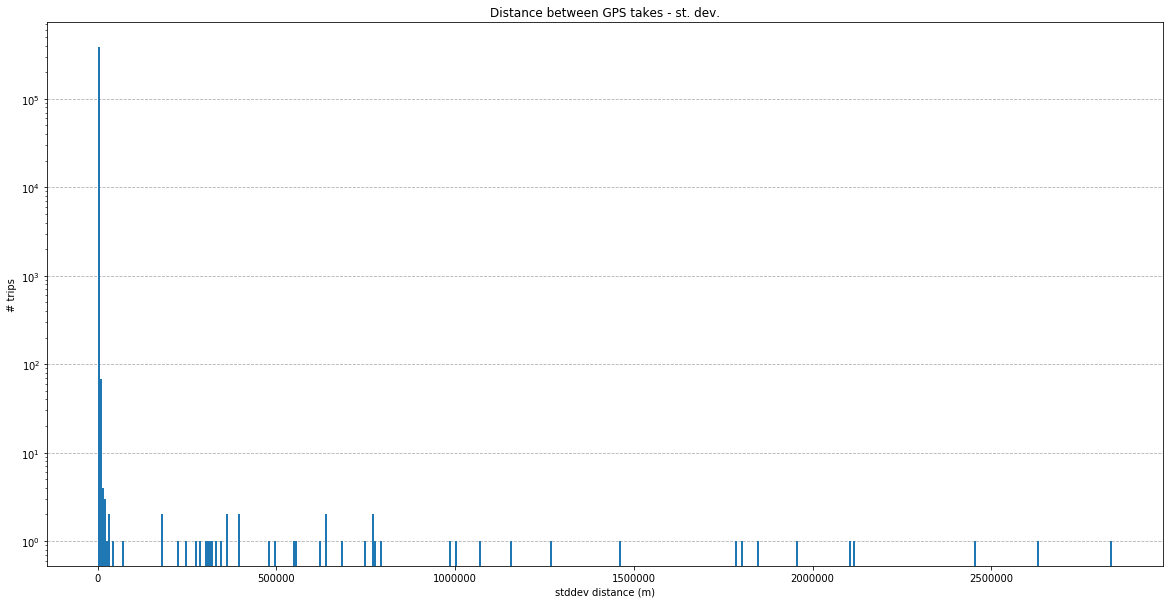

In [27]:
title = 'Distance between GPS takes - st. dev.'
print(title)
stat = stats.take_dist_std
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.log_scale(y=True)
plots.dist_chart(stat, title, 'stddev distance (m)')
plt.show()

Distance between GPS takes - st. dev.


count    3.868550e+05
mean     1.472382e+02
std      1.235631e+04
min      0.000000e+00
25%      4.110330e+00
50%      1.133822e+01
75%      1.912931e+01
max      2.838789e+06
Name: take_dist_std, dtype: float64

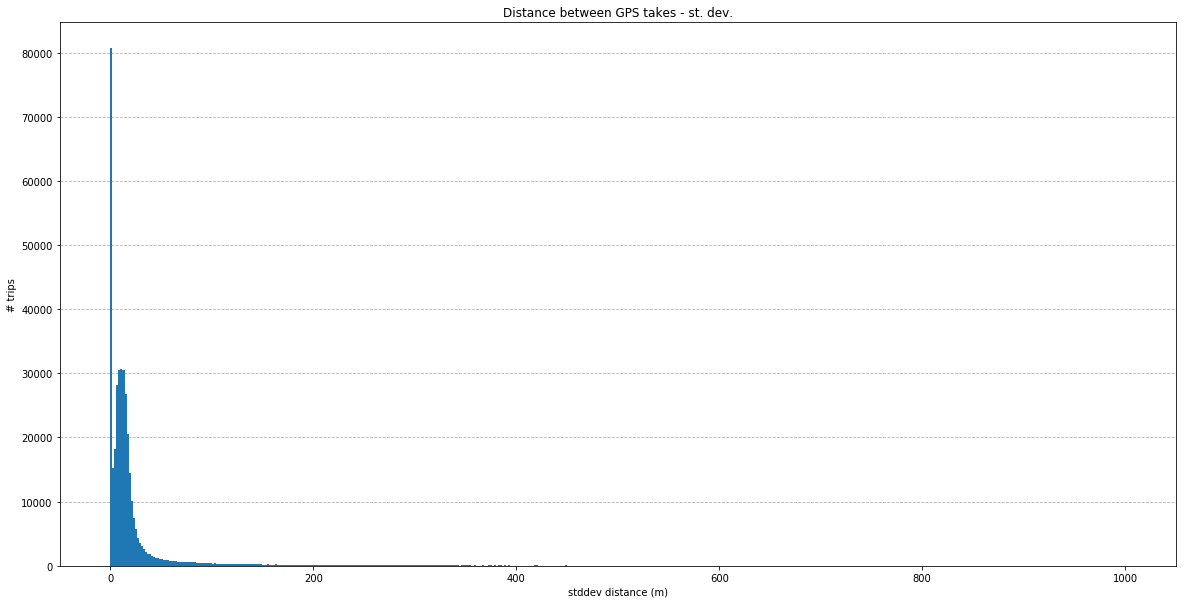

In [28]:
title = 'Distance between GPS takes - st. dev.'
print(title)
stat = stats.take_dist_std
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.dist_chart(stat[stat < 1000], title, 'stddev distance (m)')
plt.show()

* Asymmetry of take distances

GPS take distance skewness


count    386855.000000
mean          1.673184
std           2.942694
min          -2.989305
25%           0.000000
50%           0.838670
75%           2.154796
max         156.100496
Name: take_dist_skew, dtype: float64

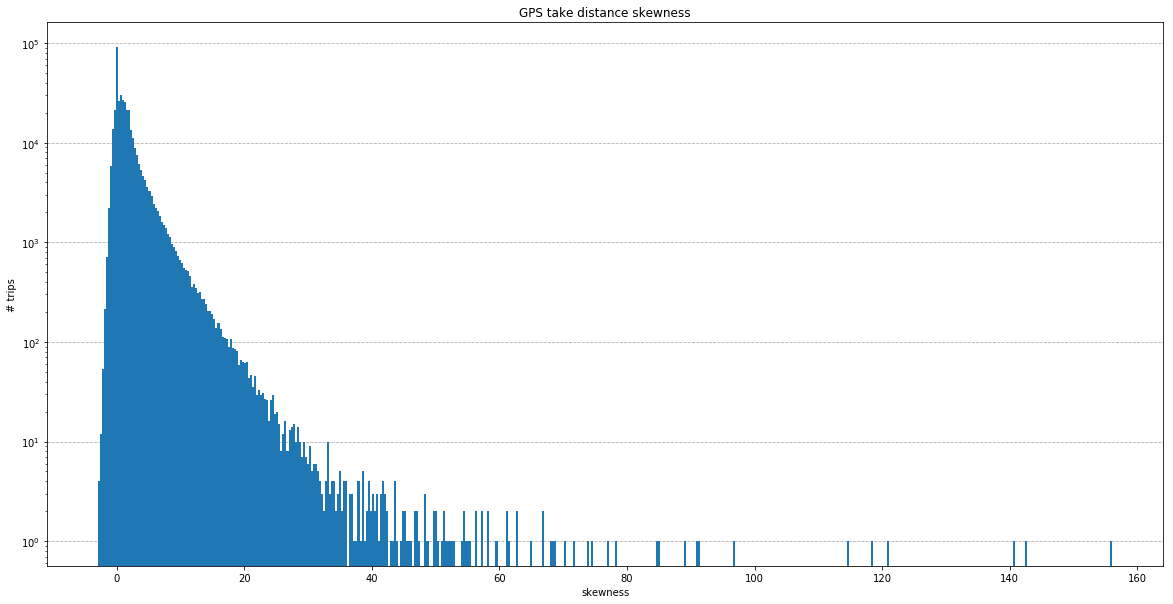

In [29]:
title = 'GPS take distance skewness'
print(title)
stat = stats.take_dist_skew
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.log_scale(y=True)
plots.dist_chart(stat, title, 'skewness')
plt.show()

GPS take distance skewness


count    386855.000000
mean          1.673184
std           2.942694
min          -2.989305
25%           0.000000
50%           0.838670
75%           2.154796
max         156.100496
Name: take_dist_skew, dtype: float64

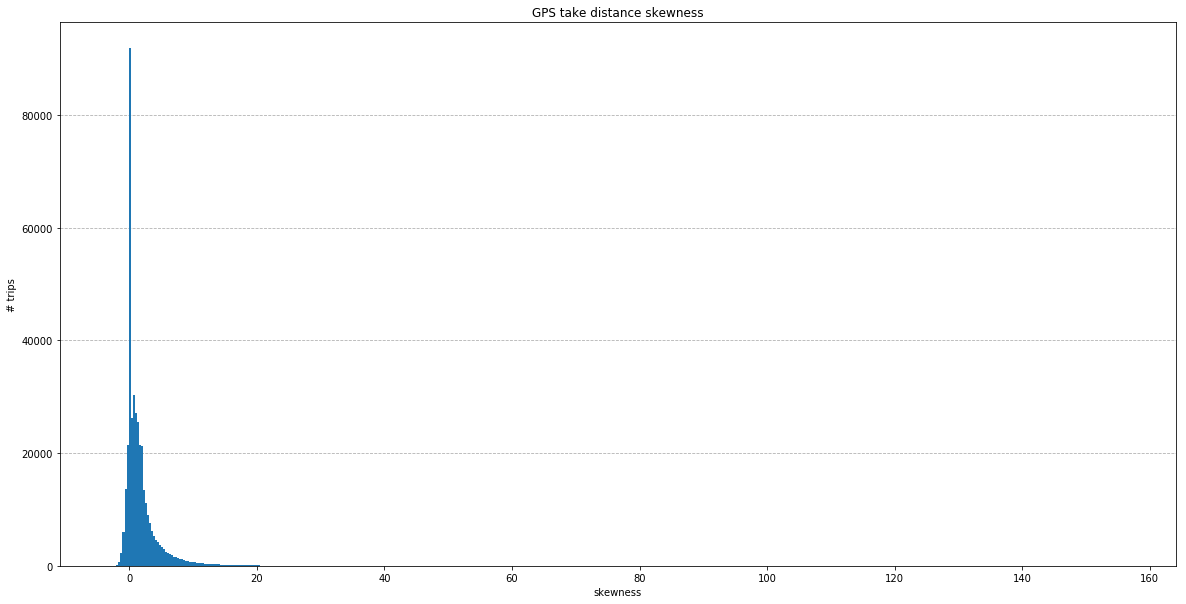

In [30]:
title = 'GPS take distance skewness'
print(title)
stat = stats.take_dist_skew
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.dist_chart(stat, title, 'skewness')
plt.show()

* Average speed

Average speed


count    386855.000000
mean         16.125715
std        1243.352837
min           0.000000
25%           2.293216
50%           7.546502
75%          10.607765
max      543589.224223
Name: avg_speed, dtype: float64

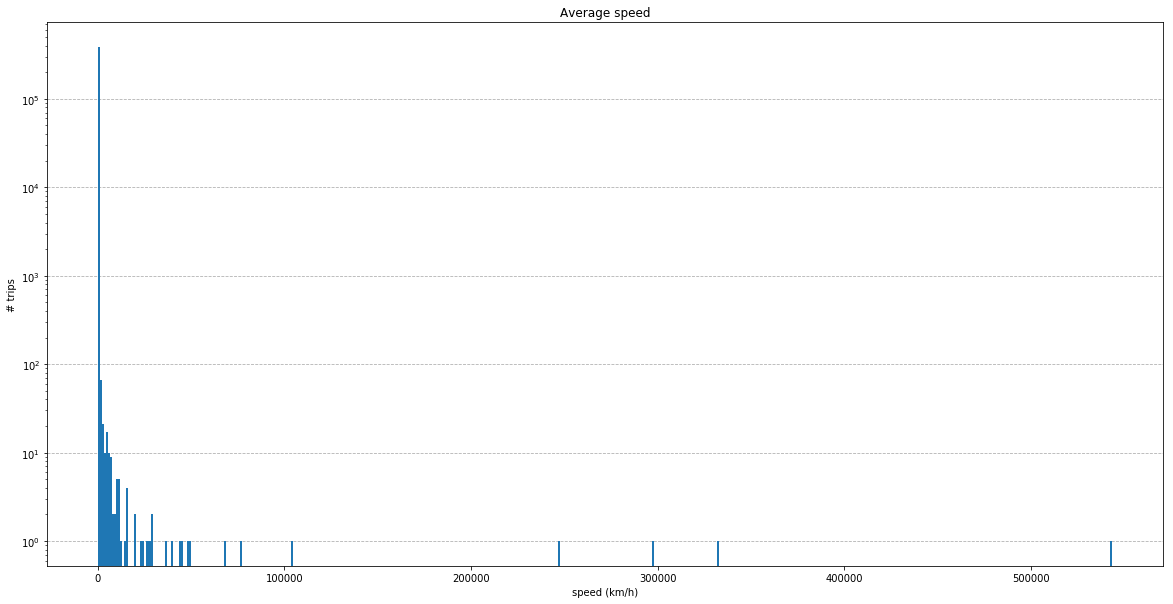

In [31]:
stats['avg_speed'] = stats.total_distance / stats.total_duration * 3.6
title = 'Average speed'
print(title)
stat = stats.avg_speed
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.log_scale(y=True)
plots.dist_chart(stat, title, 'speed (km/h)')
plt.show()

Average speed


count    386855.000000
mean         16.125715
std        1243.352837
min           0.000000
25%           2.293216
50%           7.546502
75%          10.607765
max      543589.224223
Name: avg_speed, dtype: float64

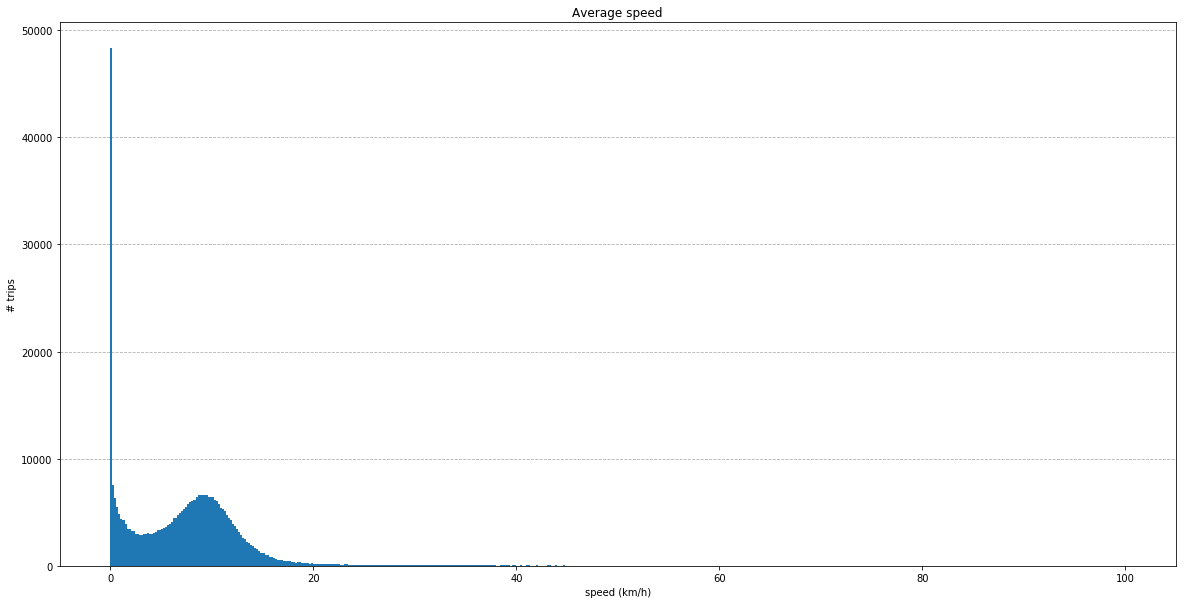

In [32]:
title = 'Average speed'
print(title)
stat = stats.avg_speed
display(stat.describe())
plt.figure(figsize=(20, 10))
plots.dist_chart(stat[stat < 100], title, 'speed (km/h)')
plt.show()

### Filtering the reasonable values

In [33]:
reasonable_filter =                       \
      (stats.num_takes < 750) &           \
      (stats.total_duration < 200*60) &   \
      (stats.mean_take_time < 50) &       \
      (stats.take_time_min < 20) &        \
      (stats.take_time_max < 400) &       \
      (stats.take_time_std < 100) &       \
      (stats.take_time_skew > -25) &      \
      (stats.take_time_skew < 30) &       \
      (stats.total_distance < 50000) &    \
      (stats.mean_take_dist < 350) &      \
      (stats.take_dist_max < 1000) &      \
      (stats.take_dist_std < 400) &       \
      (stats.take_dist_skew < 20)
very_short_filter = (stats.total_distance <= 50)
short_filter = (stats.total_distance > 50) & (stats.total_distance <= 100)
very_quick_filter = (stats.total_duration <= 1*60)
quick_filter = (stats.total_duration > 1*60) & (stats.total_duration <= 2*60)

In [34]:
columns = ['tripid'] + stats_columns
stats[reasonable_filter][columns].to_csv('~/filter-norm.csv', index=False)
stats[short_filter][columns].to_csv('~/filter-short.csv', index=False)
stats[very_short_filter][columns].to_csv('~/filter-very-short.csv', index=False)
stats[quick_filter][columns].to_csv('~/filter-quick.csv', index=False)
stats[very_quick_filter][columns].to_csv('~/filter-very-quick.csv', index=False)